In [7]:
from unet import *
from segmentation_dataset import *
from load_data import *

In [8]:
#dataloader code

import os
from torch.utils.data import DataLoader
from segmentation_dataset import SegmentationDataset
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision import datasets, transforms

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

train_path = "small_dataset/images/nir/"
val_path = "small_dataset/images/nir/"
train_labels_path = "small_dataset/labels/"

train_img_names_index = os.listdir(train_path)
val_img_names_index = os.listdir(val_path)

labels_one_hot = {}
k = 9
for i, label in enumerate(listdir_nohidden(train_labels_path)):
    labels_one_hot[label] = np.zeros((k,))
    labels_one_hot[label][i] = 1

train_dataset = SegmentationDataset(train_img_names_index, labels_one_hot)
val_dataset = SegmentationDataset(val_img_names_index, labels_one_hot)
 
batch_size = 1
shuffle = True
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


print("finished")

finished


In [9]:
# torch.device('cuda')
# model = UNet(channels,classes).to(device)

In [10]:
#SETTINGS
Use_GPU = True
Lr = 0.01
channels = 1 # 512*512 #pixels
classes = 10 #outputs 
maxEpochs = 10 # 100
batch_size = 1
shuffle = True

#Code 
if Use_GPU: 
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
else:
    device = torch.device('cpu')
#initalize model 

#fix activationfunc, dropout and other settings for model as parameters later 

model = UNet(channels,classes).to(device)

#two different filepaths
pathTrain = "Agriculture-Vision-2021\train"
pathVal = "Agriculture-Vision-2021\val"

trainValRate = 0.7 #not in use
lrRatesplan = None #not in use
activation = "relu" #not in use 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), Lr)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)

# trainY = SegmentationDataset(train_img_names_index, labels_one_hot)
# validateY = SegmentationDataset(train_img_names_index, labels_one_hot)


RuntimeError: CUDA error: device-side assert triggered

In [5]:
print(model)

UNet(
  (pool): PostProcess(
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (drop): Dropout(p=0.5, inplace=True)
  )
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (down1): DoubleConv(
    (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (down2): DoubleConv(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (down3): DoubleConv(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU(inplace=True)
  )
  (down4): DoubleConv(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(512, 

In [6]:
#trainer class/object?

from tqdm import tqdm, trange

trainingAcc = []
trainingLoss = []
validationAcc = []
validationLoss = []

def itterProgress(x, text = "training"):
    return tqdm(enumerate(x), text, total = len(x))

def run(): 
#     itter = itterProgress(trainX)
    
    
    for epoch in range(maxEpochs):
        train()
        if epoch % 10 == 0: 
            print("training Epoch :" + str(epoch)  + "max Epochs")

        # if validate_go: 
        val_loss = validate()
        if val_loss>np.mean(validationLoss):
            print("Overfitting detected")
            break
            
        model()
        accuracy()
            
        sys.stdout.write(f"\rEpoch {epoch+1}: loss={train_loss} acc={train_acc} val_loss={val_loss} val_acc={val_acc}")
        sys.stdout.flush()
        
#     print(trainingLoss)
#     print(validationLoss)
    

def train(): 
    model.train()
    for i, (batch_x, batch_y) in enumerate(train_dataloader):
        indata, target = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        indata = indata.unsqueeze(0)
        out = model.forward(indata)
        
        acc = accuracy(out,target)
        trainingAcc.append(acc)
        
        loss = criterion(out, target)
        loss_value = loss.item()
        trainingLoss.append(loss_value)
        loss.backward()
        optimizer.step()

def validate():
    model.eval()
    validationLoss_temp = []    
    for i, (batch_x, batch_y) in enumerate(val_dataloader):
        indata, target = batch_x.to(device), batch_y.to(device)
        
        with torch.no_grad():
            indata = indata.unsqueeze(0)
            out = model.forward(indata)
            
            acc = accuracy(out,target)
            validationAcc.append(acc)
            
            loss = criterion(out, target)
            loss_value = loss.item()
            validationLoss.append(loss_value)
            validationLoss_temp.append(loss_value)
    
    return np.mean(validationLoss_temp)

def accuracy(out,target):
    # Out = [n_batch, 10, 512, 512] 
    # softmax(out) = [n_batch, 512, 512] 
    # Target = [n_batch, 512, 512]
    For I in range(n_batch):
        out = softmax(targets[i])
        iou = IOU(out,targets[i])
    return iou

run()

RuntimeError: CUDA error: device-side assert triggered

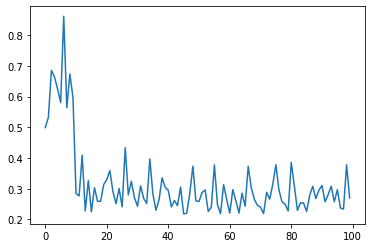

In [15]:
import matplotlib.pyplot as plt
plt.plot(validationLoss)

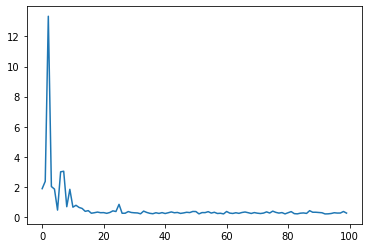

In [16]:
plt.plot(trainingLoss)

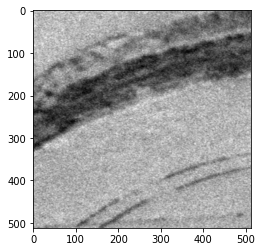

In [17]:
x,y = next(iter(train_dataloader))
plt.imshow(x[0], cmap='gray') 

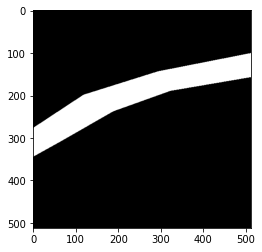

In [18]:
plt.imshow(y[0], cmap='gray') 

In [19]:
out = model.forward(x.unsqueeze(0).to(device))
out.shape

torch.Size([1, 10, 512, 512])

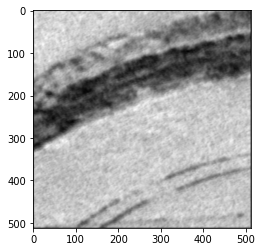

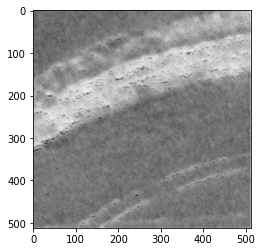

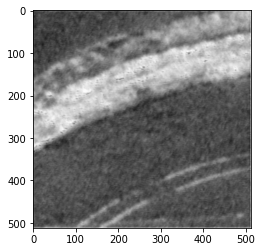

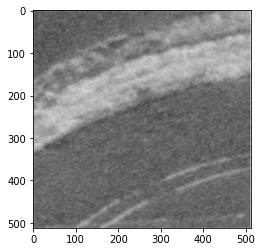

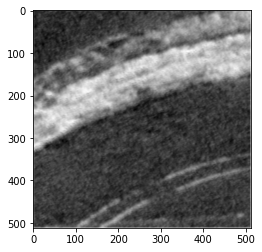

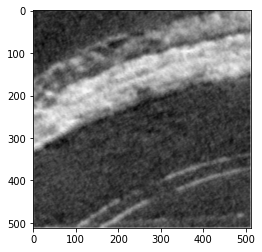

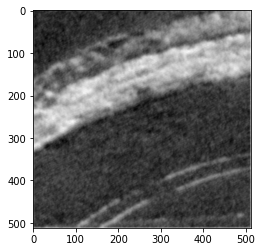

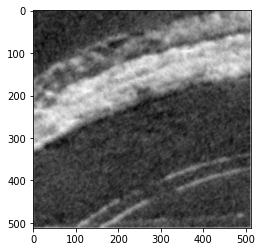

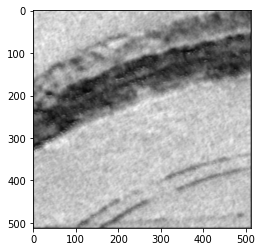

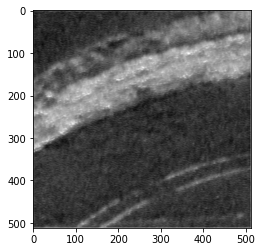

In [10]:
# import tensorflow as tf

for i in range(10):
    probs = out[0][i].cpu()
    probs = probs.detach().numpy()
    plt.show()
    plt.imshow(probs, cmap='gray')

In [45]:
out[0][0]

tensor([[ 1.5332,  2.3633,  3.2036,  ...,  3.8770,  3.3747,  2.1615],
        [ 2.9266,  4.9383,  6.1670,  ...,  7.5310,  6.3597,  4.0636],
        [ 4.3449,  6.7991,  8.5198,  ..., 10.7767,  9.0683,  6.0281],
        ...,
        [ 8.9013, 13.6984, 17.0950,  ..., 18.7679, 15.6723, 10.2632],
        [ 8.3553, 13.4240, 16.7112,  ..., 18.4897, 15.2053,  9.6569],
        [ 6.5699, 10.9920, 13.6687,  ..., 14.8497, 12.1812,  7.4069]],
       device='cuda:0', grad_fn=<SelectBackward>)